# Grid search

## Create synthetic data

In [1]:
import numpy as np
import random

X = np.arange(50,100,0.1)
y = 3000 + (2 * X) + (0.8 * X**2) + (0.25 * X**3)
# Add 15% cv scatter (normal distribution)
scatter = np.random.normal(1, 0.15, size=500)
y_train = y * scatter
scatter = np.random.normal(1, 0.15, size=500)
y_test = y * scatter

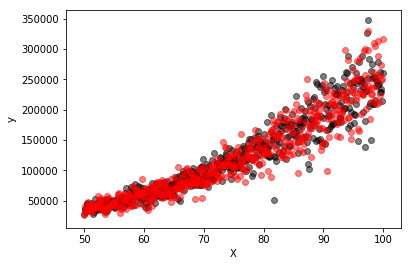

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X,y_train, color='k',alpha=0.5)
plt.scatter(X,y_test, color='r',alpha=0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [3]:
from sklearn.ensemble import RandomForestRegressor

X_reshape = X.reshape(-1,1)

model = RandomForestRegressor()
model.fit(X_reshape, y_train)

/home/michael/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

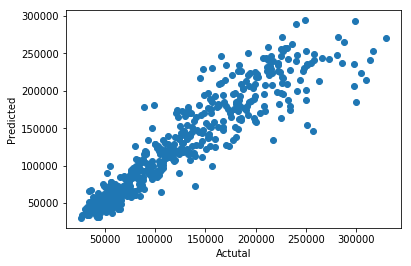

In [4]:
predicted = model.predict(X_reshape)

plt.scatter(y_test,predicted)
plt.xlabel('Actutal')
plt.ylabel('Predicted')
plt.show()

Show error:

In [5]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
print (np.int(rmse))

25767


In [6]:
## Use Grid search to optimise

from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [3, 10, 30, 100, 300],
             'bootstrap': [True, False],
             'min_samples_split': [2,3,4,5]}

# Grid search will use k-fold cross-validation (CV is number of splits)
# Grid search also needs a ultility function (higher is better) rather than
# a cost function (lower is better) so use neg square mean error

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(X_reshape, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [3, 10, 30, 100, 300], 'bootstrap': [True, False], 'min_samples_split': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [7]:
# show best parameters
# If best parameters are at the extremes of the searches then extend the range

grid_search.best_params_

{'bootstrap': True, 'min_samples_split': 5, 'n_estimators': 300}

In [8]:
# Or, full 
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [9]:
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

model.fit(X_reshape, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [10]:
predicted = model.predict(X_reshape)
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
print (np.int(rmse))

26903
